In [1]:
# Add the parent directory to sys.path
import sys, os
from pathlib import Path

current_directory = os.getcwd()
parent_directory = Path(current_directory).parent.parent
sys.path.insert(0, str(parent_directory))
sys.path

['c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\DLLs',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\Lib',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv',
 '',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\win32',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\Pythonwin']

## Connect to DataBase

In [2]:
# Import the utils module
from scripts import utils

In [3]:
# Load environment variables and connect to database
CREDENTIALS = utils.load_environment_variables(parent_directory=parent_directory)
connection = utils.connect_to_database({"dbname": CREDENTIALS['DB_NAME'],
                                 "user": CREDENTIALS['USER'],
                                 "host": CREDENTIALS['host'],
                                 "port": CREDENTIALS['port']})

INFO:scripts.utils:Trying to load environment variables from c:\Users\mekbi\Desktop\Kifiya\week-2\telecom-data-analysis/.env
INFO:scripts.utils:Credentials loaded successfully
INFO:scripts.utils:Attempting to connect to the database
INFO:scripts.utils:Connection successful


In [4]:
# Load the db files into pandas dataframe and close the connection
table_name = 'xdr_data'
df = utils.load_data_from_db(conn=connection,
                       table_name=table_name)
utils.close_database_connection(conn=connection)

INFO:root:Executing query: SELECT * FROM xdr_data
c:\Users\mekbi\Desktop\Kifiya\week-2\telecom-data-analysis\scripts\utils.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
INFO:scripts.utils:Data loaded into DataFrame successfully
INFO:root:Database connection closed successfully


# EDA Analysis

#### Missing values

In [6]:
# Import the missing value handler class and create an instance for it
from scripts.data_processing import MissingValueHandler

missing_value_handler = MissingValueHandler(df=df)

INFO:root:MissingValueHandler instance created


In [7]:
# Summary of missing values
summary = missing_value_handler.missing_value_summary()
summary

INFO:root:Missing value summary computed successfully


Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
# Missing  value percentage
percentage = missing_value_handler.missing_value_percentage()
percentage

INFO:root:Missing value percentage computed successfully


Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

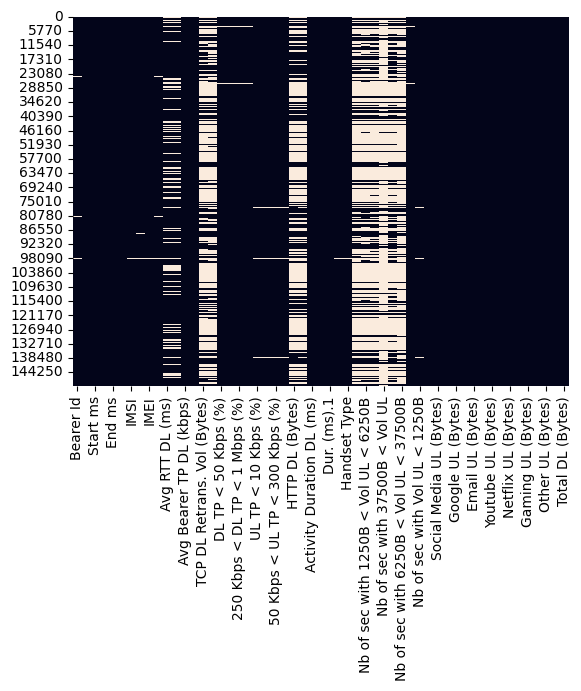

INFO:root:Missing values heatmap displayed successfully


In [9]:
# Missing value heatmap
missing_value_handler.missing_values_heatmap()

- We can see that most of the relevant values are collected successfully while less significant variables like Avg RTT DL (ms), Avg RTT UL (ms), TCP DL Retrans. Vol (Bytes), TCP UL Retrans. Vol (Bytes) and HTTP DL (Bytes) are missing to a great extent.

In [14]:
# Collect relevant variables in a separate dataframe
relevant_variables = ['Bearer Id', 'Dur. (ms)',
                      'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                      'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                      'Google DL (Bytes)', 'Google UL (Bytes)',
                      'Email DL (Bytes)', 'Email UL (Bytes)',
                      'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                      'Other DL (Bytes)', 'Other UL (Bytes)',
                      'Total DL (Bytes)', 'Total UL (Bytes)',
                      ]
relevant_df = df[relevant_variables]
relevant_df.head()

,Bearer Id,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
0,1.311448e+19,1823652.0,1545765.0,24420.0,15854611.0,2501332.0,8198936.0,9656251.0,1634479.0,1271433.0,3563542.0,137762.0,278082303.0,14344150.0,171744450.0,8814393.0,308879636.0,36749741.0
1,1.311448e+19,1365104.0,1926113.0,7165.0,20247395.0,19111729.0,18338413.0,17227132.0,3493924.0,920172.0,629046.0,308339.0,608750074.0,1170709.0,526904238.0,15055145.0,653384965.0,53800391.0
2,1.311448e+19,1361762.0,1684053.0,42224.0,19725661.0,14699576.0,17587794.0,6163408.0,8535055.0,1694064.0,2690151.0,672973.0,229584621.0,395630.0,410692588.0,4215763.0,279807335.0,27883638.0
3,1.311448e+19,1321509.0,644121.0,13372.0,21388122.0,15146643.0,13994646.0,1097942.0,9023734.0,2788027.0,1439754.0,631229.0,799538153.0,10849722.0,749039933.0,12797283.0,846028530.0,43324218.0
4,1.311448e+19,1089009.0,862600.0,50188.0,15259380.0,18962873.0,17124581.0,415218.0,6248284.0,1500559.0,1936496.0,173853.0,527707248.0,3529801.0,550709500.0,13910322.0,569138589.0,38542814.0


In [15]:
# Create a new instance of the MissingValueHandler
missing_value_handler = MissingValueHandler(df=relevant_df)

INFO:root:MissingValueHandler instance created


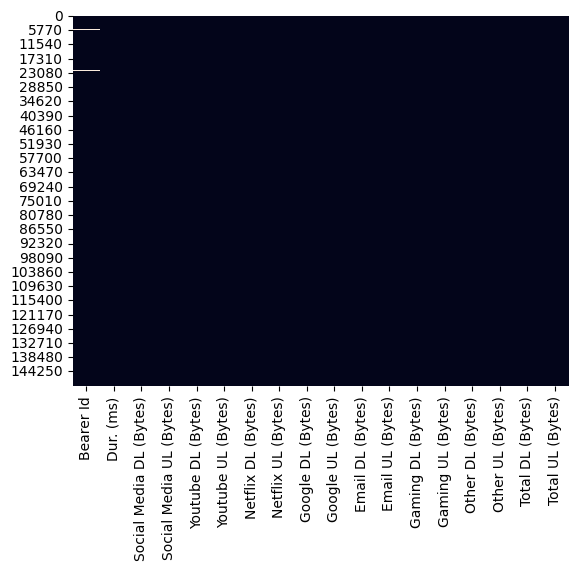

INFO:root:Missing values heatmap displayed successfully


In [16]:
# Get missing value heatmap
missing_value_handler.missing_values_heatmap()

#### Description and correlation matrix

- We can see that all the relevant fields have almost complete data.

In [17]:
# Describe all relevant variables
description = missing_value_handler.describe_numeric_columns()
description

INFO:root:Numeric column descriptions computed successfully


,Bearer Id,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
count,1.490100e+05,1.500000e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,1.046086e+05,1.795322e+06,32928.434380,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.546434e+08,4.112121e+07
std,2.893173e+18,8.103762e+04,1.035482e+06,19006.178256,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,2.441429e+08,1.127639e+07
min,6.917538e+18,7.142000e+03,1.200000e+01,0.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.114041e+06,2.866892e+06
25%,7.349883e+18,5.744050e+04,8.991480e+05,16448.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,2.431068e+08,3.322201e+07
50%,7.349883e+18,8.639900e+04,1.794369e+06,32920.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.558411e+08,4.114331e+07
75%,1.304243e+19,1.324302e+05,2.694938e+06,49334.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,6.657055e+08,4.903424e+07
max,1.318654e+19,1.859336e+06,3.586064e+06,65870.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,9.029696e+08,7.833131e+07


In [18]:
# Correlation matrix for missing value
corr_matrix = missing_value_handler.correlation_matrix()
corr_matrix

INFO:root:Correlation matrix computed successfully


,Bearer Id,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
Bearer Id,1.000000,0.007515,-0.000845,-0.001124,-0.002466,-0.000703,-0.000622,-0.003725,-0.000693,0.002257,0.002626,-0.000328,0.000487,-0.003212,0.000943,-0.002240,0.000400,-0.004577
Dur. (ms),0.007515,1.000000,-0.002716,-0.001286,0.003853,0.002211,-0.001834,-0.005517,0.001228,-0.003466,0.003956,-0.001271,0.000691,0.001841,-0.000404,0.001101,0.000768,-0.001019
Social Media DL (Bytes),-0.000845,-0.002716,1.000000,-0.000555,-0.001389,0.002345,-0.001817,0.003457,-0.001954,0.000186,0.004745,-0.002518,0.001018,0.003095,0.006126,0.000610,0.005164,0.004798
Social Media UL (Bytes),-0.001124,-0.001286,-0.000555,1.000000,-0.001786,-0.002368,-0.000772,-0.002493,0.003542,0.001085,0.004823,-0.001427,0.000210,0.000844,-0.003850,0.000971,0.000206,-0.000204
Youtube DL (Bytes),-0.002466,0.003853,-0.001389,-0.001786,1.000000,0.002433,0.001202,0.001746,0.001760,0.001122,0.001679,-0.000320,-0.001861,-0.001893,0.002042,-0.004830,0.025685,-0.000384
Youtube UL (Bytes),-0.000703,0.002211,0.002345,-0.002368,0.002433,1.000000,0.000423,0.002477,0.000638,0.001670,-0.004305,-0.006834,-0.002382,0.000898,0.002296,-0.001393,-0.002301,0.563917
Netflix DL (Bytes),-0.000622,-0.001834,-0.001817,-0.000772,0.001202,0.000423,1.000000,0.001065,0.000548,-0.001288,0.001351,-0.000011,-0.003201,-0.000633,-0.006000,-0.002588,0.024386,-0.000662
Netflix UL (Bytes),-0.003725,-0.005517,0.003457,-0.002493,0.001746,0.002477,0.001065,1.000000,-0.001569,-0.004073,-0.000016,0.000532,-0.001051,-0.004015,-0.006691,-0.003447,-0.000979,0.561779
Google DL (Bytes),-0.000693,0.001228,-0.001954,0.003542,0.001760,0.000638,0.000548,-0.001569,1.000000,-0.000103,-0.000039,0.000742,-0.001421,-0.001429,-0.002557,-0.000882,0.012189,-0.001492
Google UL (Bytes),0.002257,-0.003466,0.000186,0.001085,0.001122,0.001670,-0.001288,-0.004073,-0.000103,1.000000,-0.001157,-0.002050,0.001140,-0.002516,0.002097,-0.002219,0.001129,0.102113


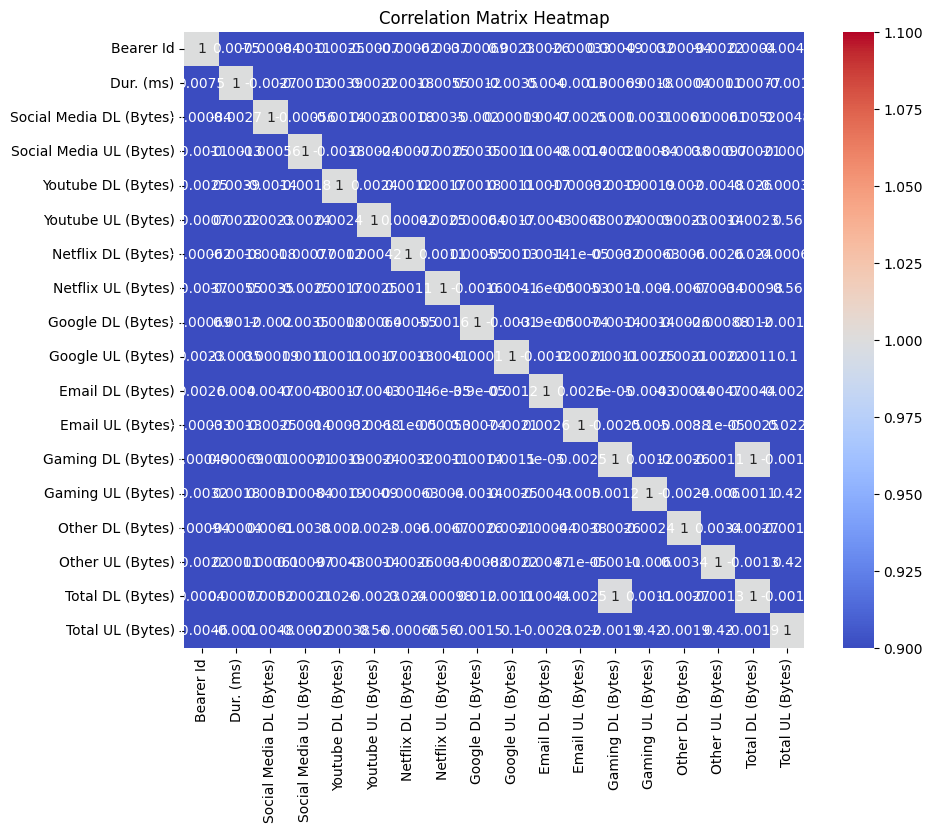

In [20]:
# Heat map for correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


#### outliers

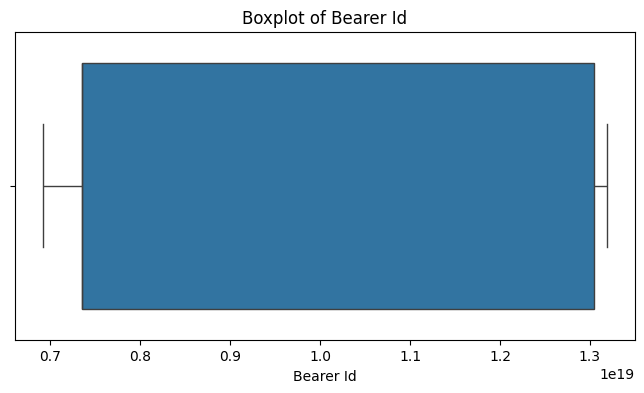

INFO:root:Boxplot for column 'Bearer Id' displayed successfully


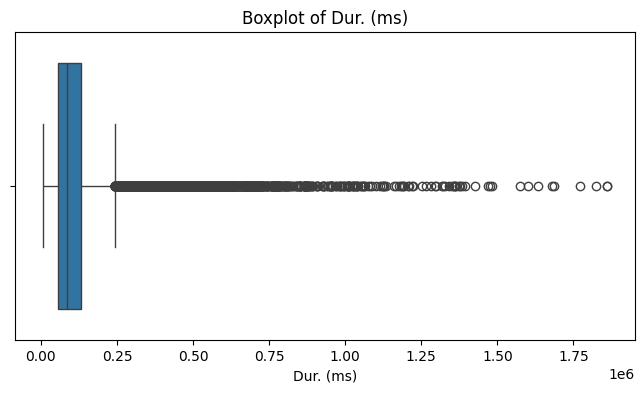

INFO:root:Boxplot for column 'Dur. (ms)' displayed successfully


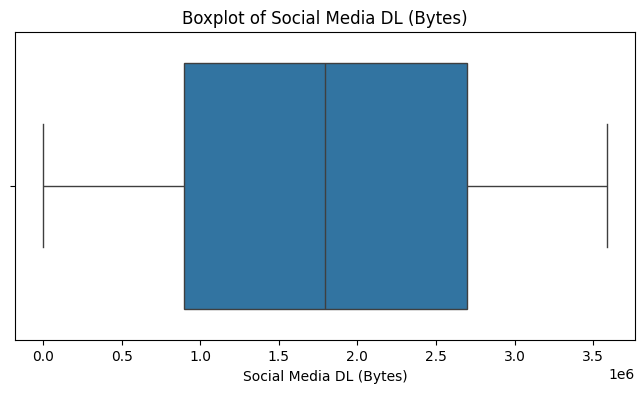

INFO:root:Boxplot for column 'Social Media DL (Bytes)' displayed successfully


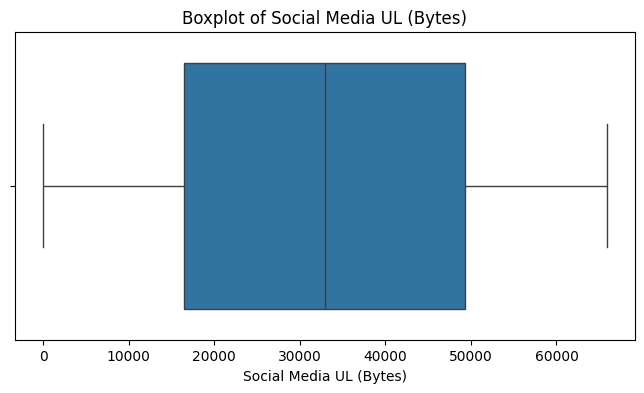

INFO:root:Boxplot for column 'Social Media UL (Bytes)' displayed successfully


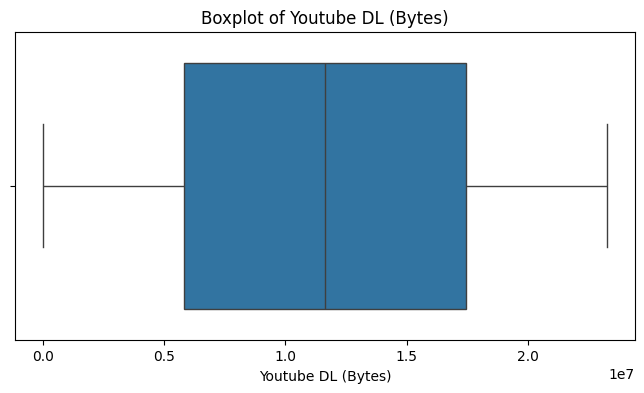

INFO:root:Boxplot for column 'Youtube DL (Bytes)' displayed successfully


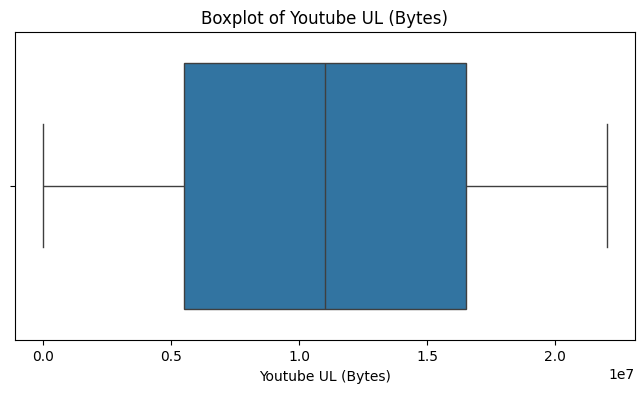

INFO:root:Boxplot for column 'Youtube UL (Bytes)' displayed successfully


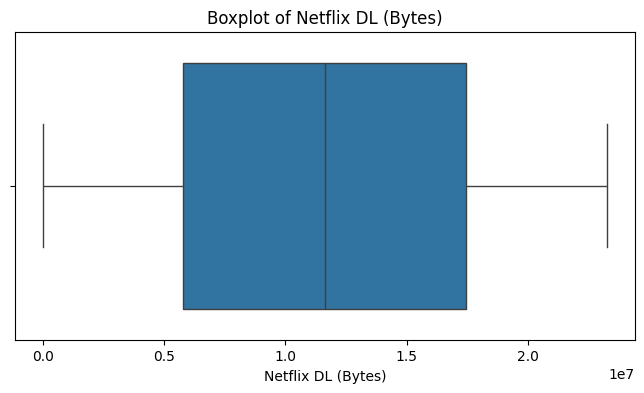

INFO:root:Boxplot for column 'Netflix DL (Bytes)' displayed successfully


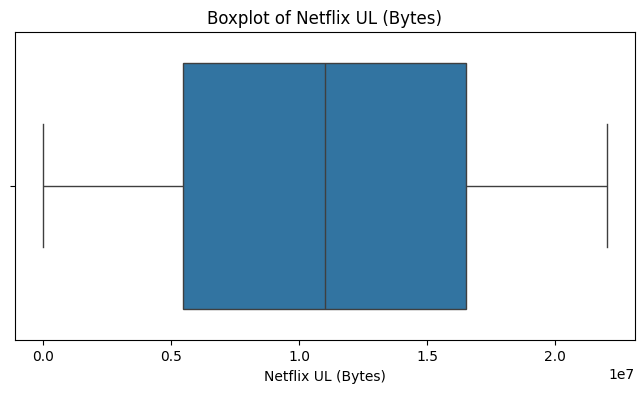

INFO:root:Boxplot for column 'Netflix UL (Bytes)' displayed successfully


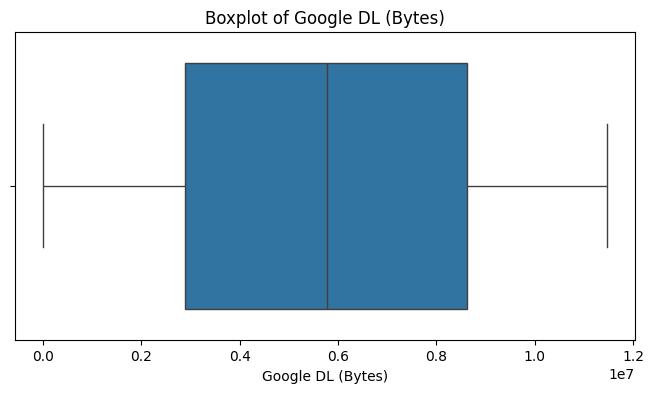

INFO:root:Boxplot for column 'Google DL (Bytes)' displayed successfully


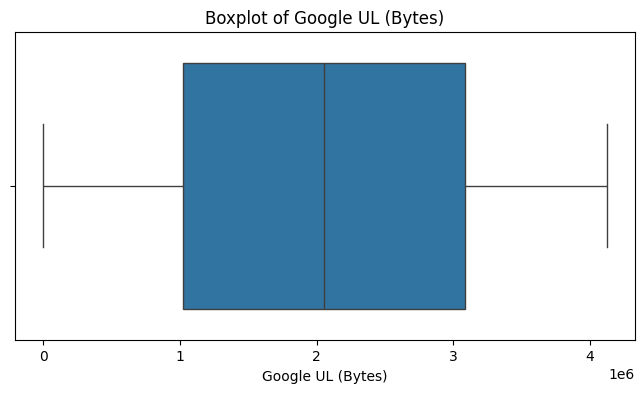

INFO:root:Boxplot for column 'Google UL (Bytes)' displayed successfully


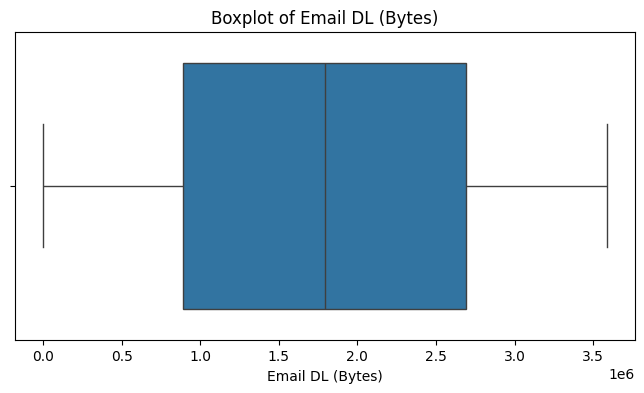

INFO:root:Boxplot for column 'Email DL (Bytes)' displayed successfully


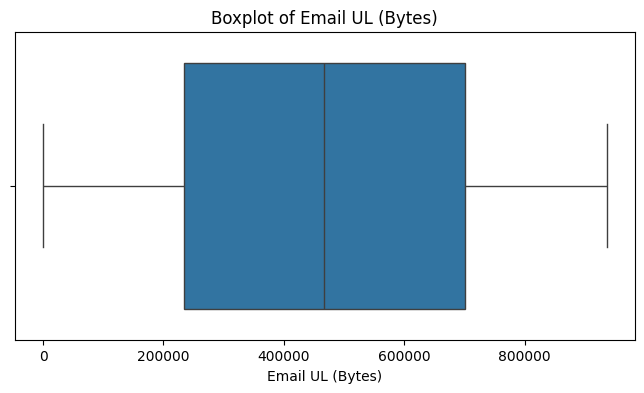

INFO:root:Boxplot for column 'Email UL (Bytes)' displayed successfully


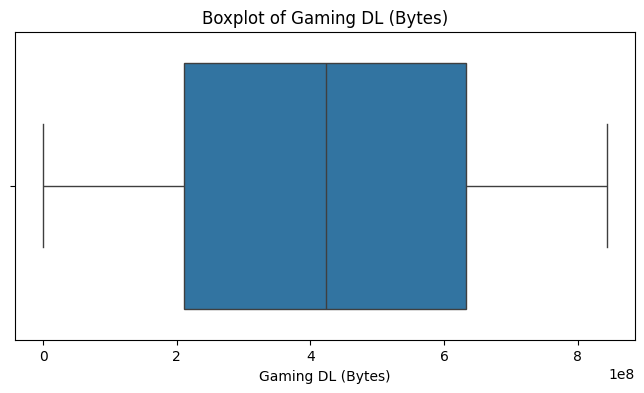

INFO:root:Boxplot for column 'Gaming DL (Bytes)' displayed successfully


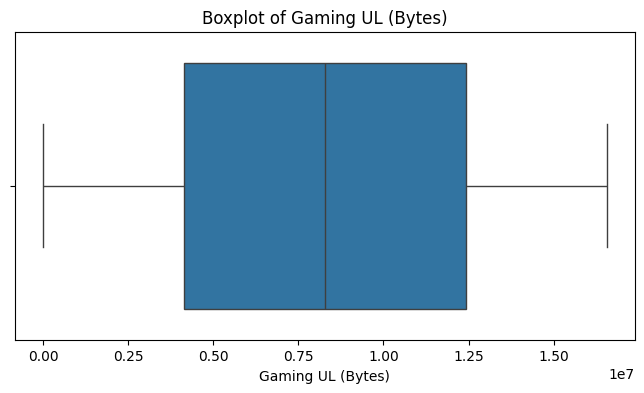

INFO:root:Boxplot for column 'Gaming UL (Bytes)' displayed successfully


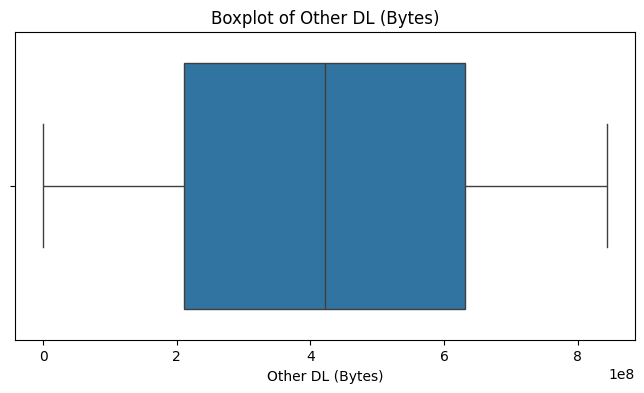

INFO:root:Boxplot for column 'Other DL (Bytes)' displayed successfully


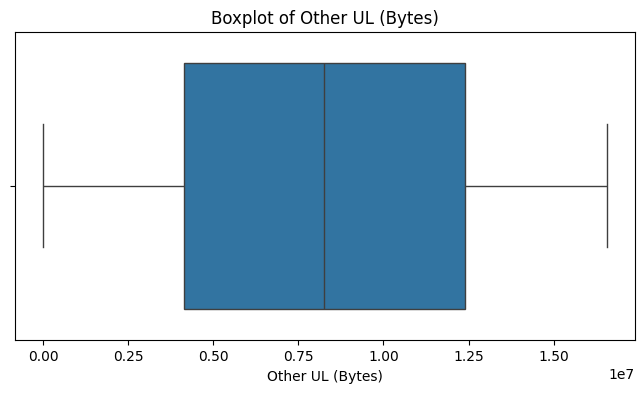

INFO:root:Boxplot for column 'Other UL (Bytes)' displayed successfully


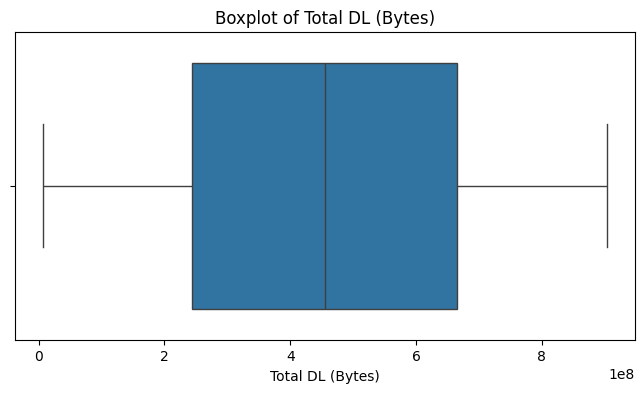

INFO:root:Boxplot for column 'Total DL (Bytes)' displayed successfully


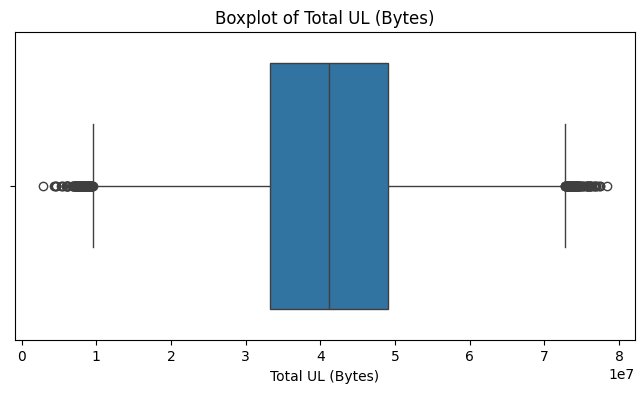

INFO:root:Boxplot for column 'Total UL (Bytes)' displayed successfully


In [21]:
# Inspect outliers for all columns
missing_value_handler.inspect_outliers()

- The data shows overall data integration except the Durations and Total Upload data columns which exhibit significant number of outliers.